In [2]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from scipy.stats import kurtosis, skew

# Load the dataset
 
data = pd.read_csv('attendence.csv')

# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d', errors='coerce')  # Convert Date to datetime
data.fillna(0, inplace=True)  # Handle missing values

data.head()


,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,2018-09-05,172,19,153,0
1,01M015,2018-09-06,171,17,154,0
2,01M015,2018-09-07,172,14,158,0
3,01M015,2018-09-12,173,7,166,0
4,01M015,2018-09-13,173,9,164,0


In [2]:
# Add derived columns
data['Attendance_Percentage'] = (data['Present'] / data['Enrolled']) * 100
data['Attendance_Percentage'].fillna(0, inplace=True)
data['Absent_Percentage'] = (data['Absent'] / data['Enrolled']) * 100
data['Absent_Percentage'].fillna(0, inplace=True)

# Statistical Depth
stats_summary = data.describe()  # Basic statistics
correlation_matrix = data[['Enrolled', 'Absent', 'Present', 'Released']].corr()  # Correlation matrix
skewness = data[['Enrolled', 'Absent', 'Present', 'Released']].apply(skew)  # Skewness
kurt = data[['Enrolled', 'Absent', 'Present', 'Released']].apply(kurtosis)  # Kurtosis

# Display statistics
print("Basic Statistics:\n", stats_summary)
print("\nCorrelation Matrix:\n", correlation_matrix)
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurt)


C:\Users\kisho\AppData\Local\Temp\ipykernel_22148\2152989778.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Attendance_Percentage'].fillna(0, inplace=True)
C:\Users\kisho\AppData\Local\Temp\ipykernel_22148\2152989778.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

Basic Statistics:
                                 Date      Enrolled         Absent  \
count                         277153  277153.00000  277153.000000   
mean   2019-01-28 12:18:24.343088128     596.98617      50.503538   
min              2018-09-04 00:00:00       1.00000       0.000000   
25%              2018-11-13 00:00:00     329.00000      23.000000   
50%              2019-01-29 00:00:00     476.00000      38.000000   
75%              2019-04-10 00:00:00     684.00000      59.000000   
max              2019-06-26 00:00:00    5955.00000    2151.000000   
std                              NaN     482.90966      54.329671   

             Present       Released  Attendance_Percentage  Absent_Percentage  
count  277153.000000  277153.000000          277153.000000      277153.000000  
mean      544.499403       1.983229              89.792072           9.883084  
min         1.000000       0.000000               0.046253           0.000000  
25%       291.000000       0.000000    

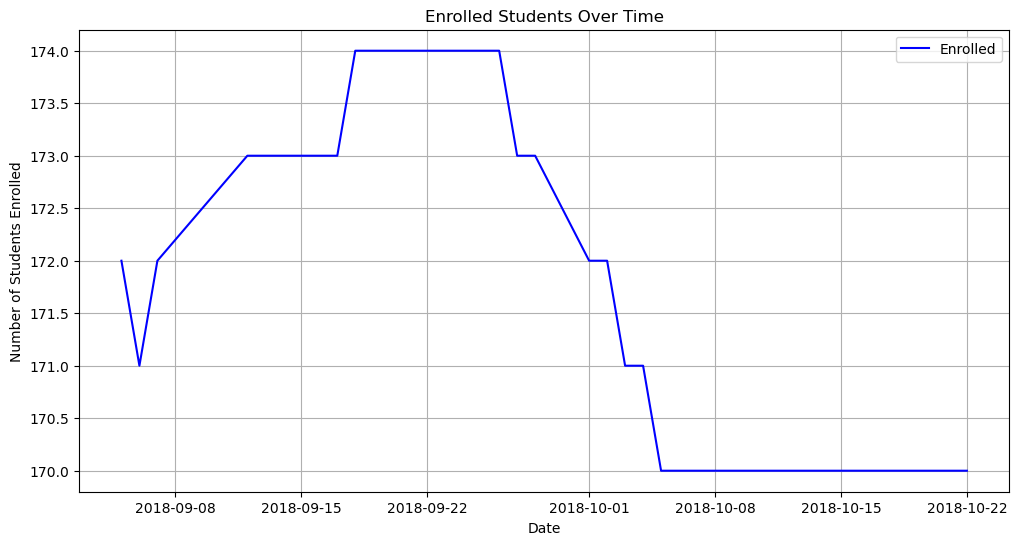

In [3]:
# Relational Graph: Line Plot of Enrolled vs. Date
def plot_line(data):
    """
    Creates a line plot for Enrolled vs Date.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Enrolled'], label='Enrolled', color='blue')
    plt.title('Enrolled Students Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Students Enrolled')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_line(data.head(n=30))

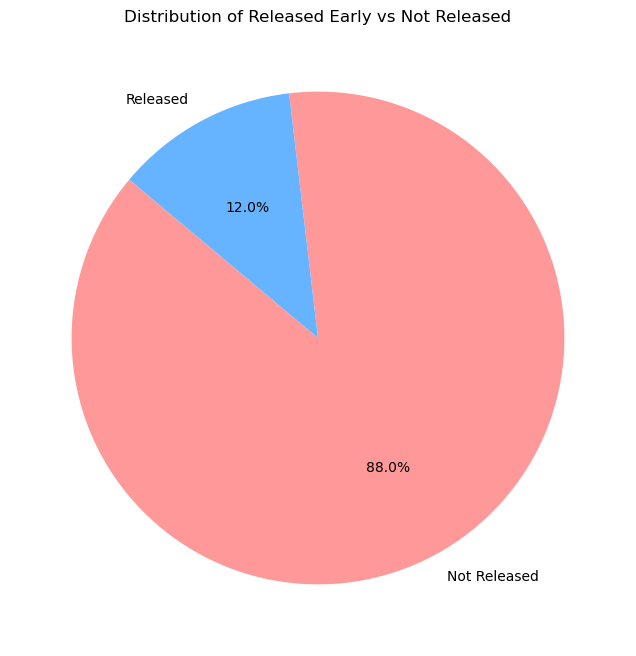

In [4]:
# Categorical Graph: Pie Chart of Released vs Not Released
def plot_pie(data):
    """
    Creates a pie chart for Released vs Not Released.
    """
    released_counts = [data['Released'].eq(0).sum(), data['Released'].gt(0).sum()]
    labels = ['Not Released', 'Released']

    plt.figure(figsize=(8, 8))
    plt.pie(released_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#FF9999', '#66B3FF'])
    plt.title('Distribution of Released Early vs Not Released')
    plt.show()

plot_pie(data)

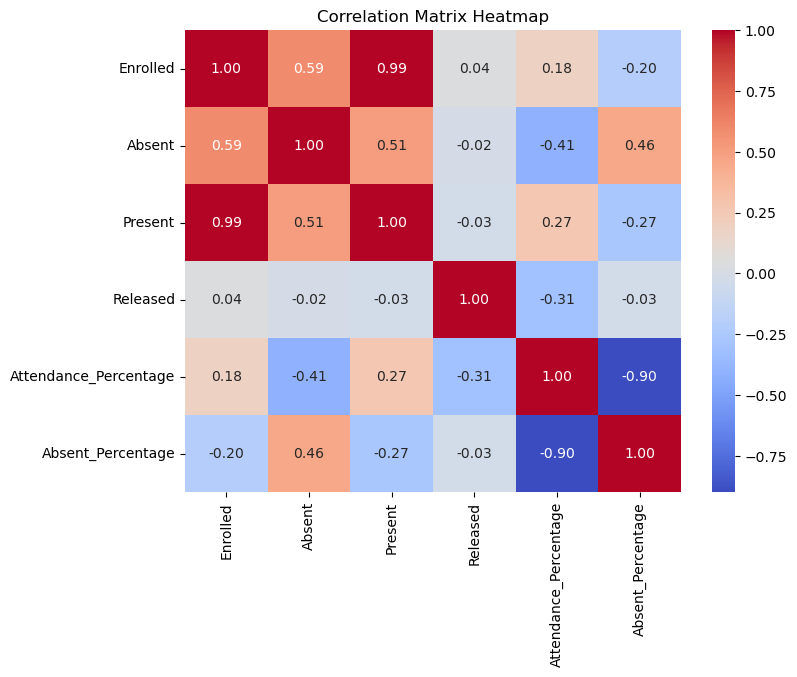

In [5]:
# Statistical Graph: Heatmap of Correlations
def plot_heatmap(data):
    """
    Creates a heatmap for the correlation matrix.
    """
    # Select only numeric columns for correlation
    numeric_data = data.select_dtypes(include=['number'])
    correlation_matrix = numeric_data.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

plot_heatmap(data)


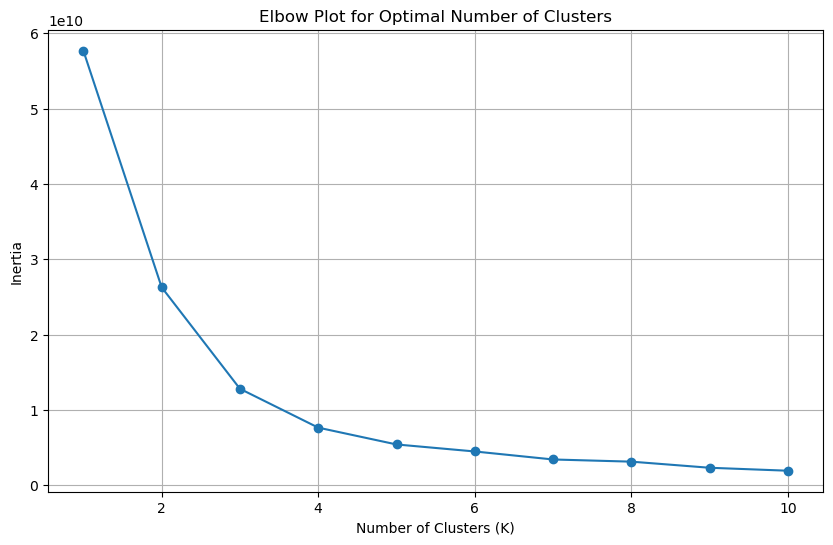

In [6]:
# Elbow Plot Function
def plot_elbow(data, features, max_clusters=10):
    """
    Creates an elbow plot to determine the optimal number of clusters.
    
    Parameters:
        data (DataFrame): The input data for clustering.
        features (list): List of column names to use for clustering.
        max_clusters (int): Maximum number of clusters to test.
    """
    X = data[features].dropna()  # Select specified features and remove missing values
    inertia = []  # To store inertia values

    # Fit K-means for a range of cluster numbers
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Plot for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

# Features for clustering
features = ['Absent', 'Present']  # Select relevant columns for clustering
plot_elbow(data, features)

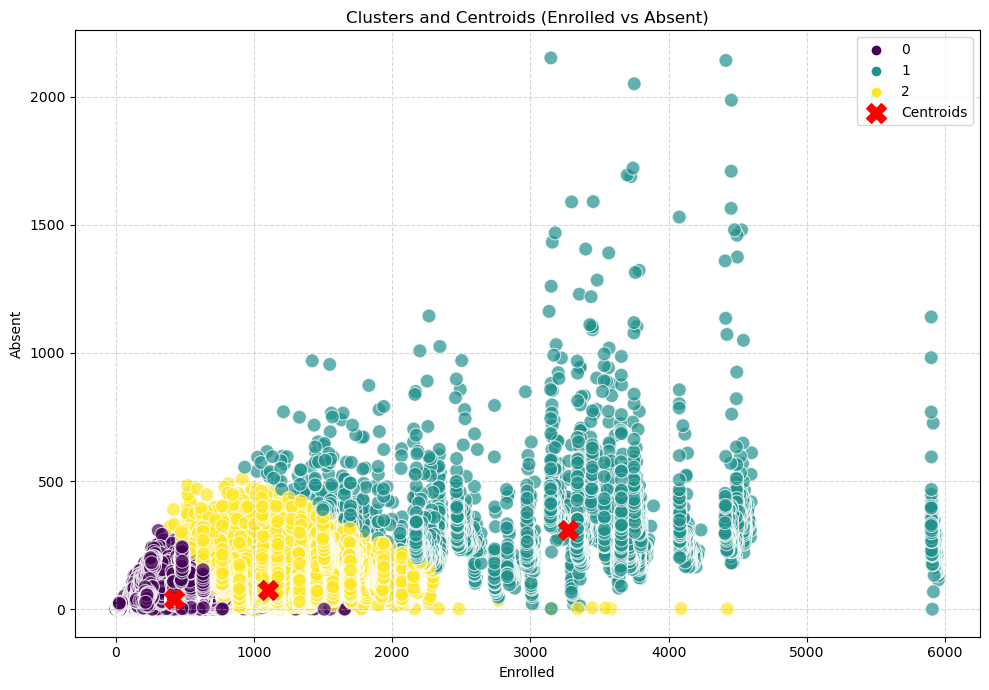

C:\Users\kisho\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


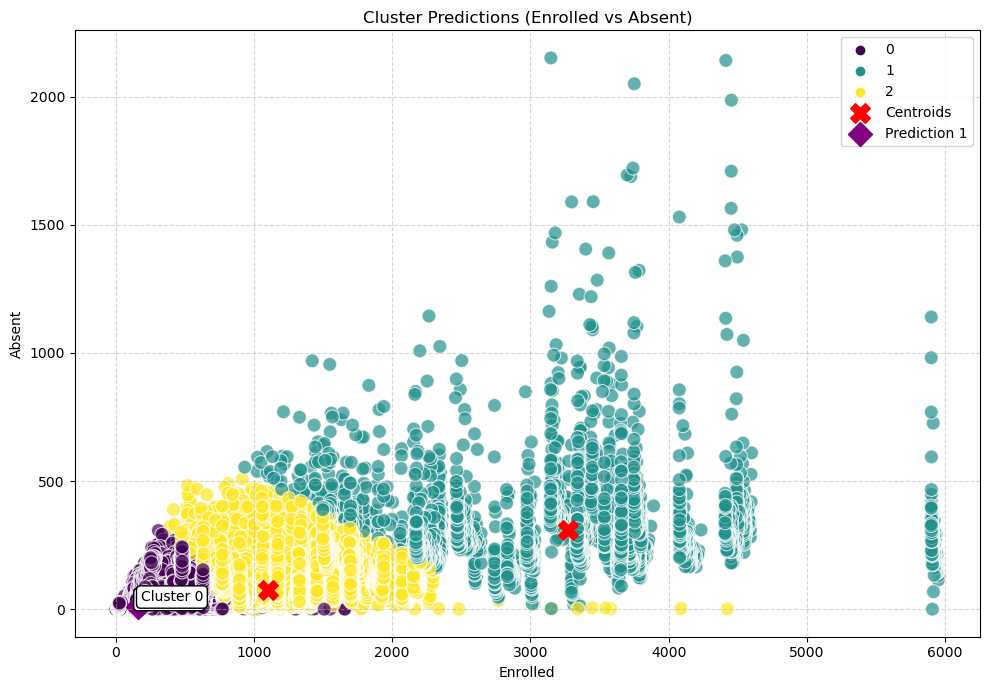

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select columns for clustering
columns_to_cluster = ['Enrolled', 'Absent', 'Present']  # Replace with relevant columns
clustering_data = data[columns_to_cluster].dropna()

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the Elbow Method
def determine_optimal_clusters(data, max_clusters=10):
    distortions = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    # Determine the elbow point (manual selection based on distortions)
    elbow_point = 3  # Replace this with your determined elbow point
    return elbow_point

# Get the optimal number of clusters
optimal_clusters = determine_optimal_clusters(normalized_data)

# Fit K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
labels = kmeans.fit_predict(normalized_data)

# Add cluster labels to the dataset
clustering_data['Cluster'] = labels

# Back-scale cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot clusters and centroids
def visualize_clusters(data, cluster_centers, x_column, y_column):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue='Cluster', palette='viridis', s=100, alpha=0.7)
    plt.scatter(
        cluster_centers[:, columns_to_cluster.index(x_column)],
        cluster_centers[:, columns_to_cluster.index(y_column)],
        color='red', marker='X', s=200, label='Centroids'
    )
    plt.title(f'Clusters and Centroids ({x_column} vs {y_column})')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Visualize clusters using two numerical columns
visualize_clusters(clustering_data, cluster_centers, x_column='Enrolled', y_column='Absent')

# Predictions for new points
new_points = np.array([[170, 15, 155], [160, 10, 150], [180, 20, 160]])  # Replace with actual new data points
normalized_new_points = scaler.transform(new_points)
predictions = kmeans.predict(normalized_new_points)

# Plot predictions with clusters
def visualize_predictions(data, cluster_centers, new_points, x_column, y_column):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=data, x=x_column, y=y_column, hue='Cluster', palette='viridis', s=100, alpha=0.7)
    plt.scatter(
        cluster_centers[:, columns_to_cluster.index(x_column)],
        cluster_centers[:, columns_to_cluster.index(y_column)],
        color='red', marker='X', s=200, label='Centroids'
    )
    for i, point in enumerate(new_points):
        plt.scatter(point[columns_to_cluster.index(x_column)], point[columns_to_cluster.index(y_column)],
                    color='purple', s=150, marker='D', label=f'Prediction {i+1}' if i == 0 else "")
        plt.text(
            point[columns_to_cluster.index(x_column)], point[columns_to_cluster.index(y_column)],
            f'Cluster {predictions[i]}', fontsize=10, ha='left', va='bottom', color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )
    plt.title(f'Cluster Predictions ({x_column} vs {y_column})')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

visualize_predictions(clustering_data, cluster_centers, scaler.inverse_transform(normalized_new_points),
                      'Enrolled', 'Absent')


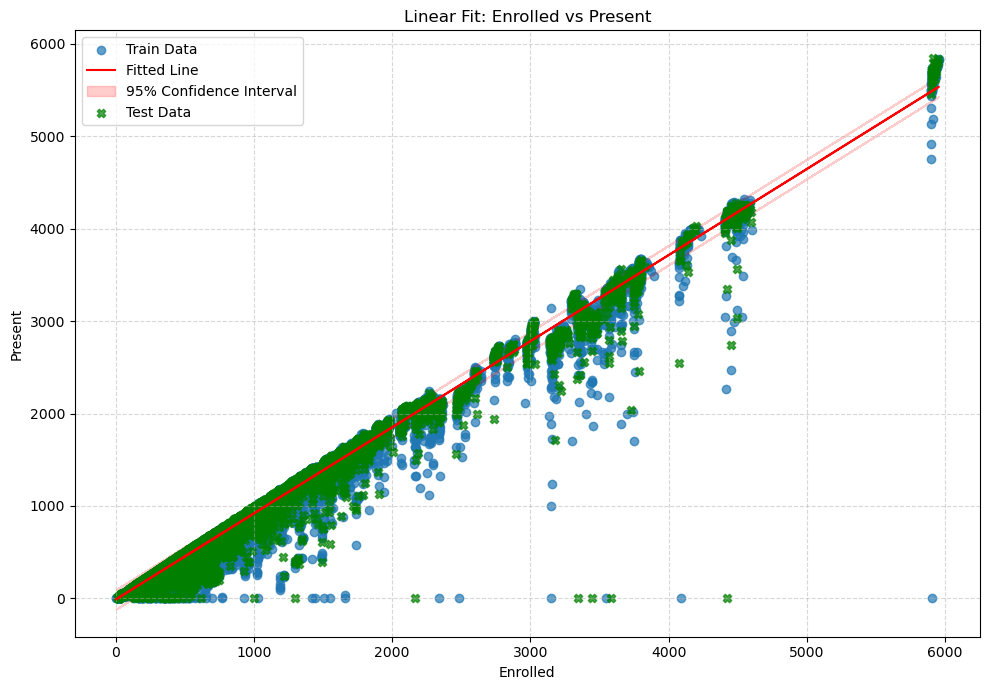

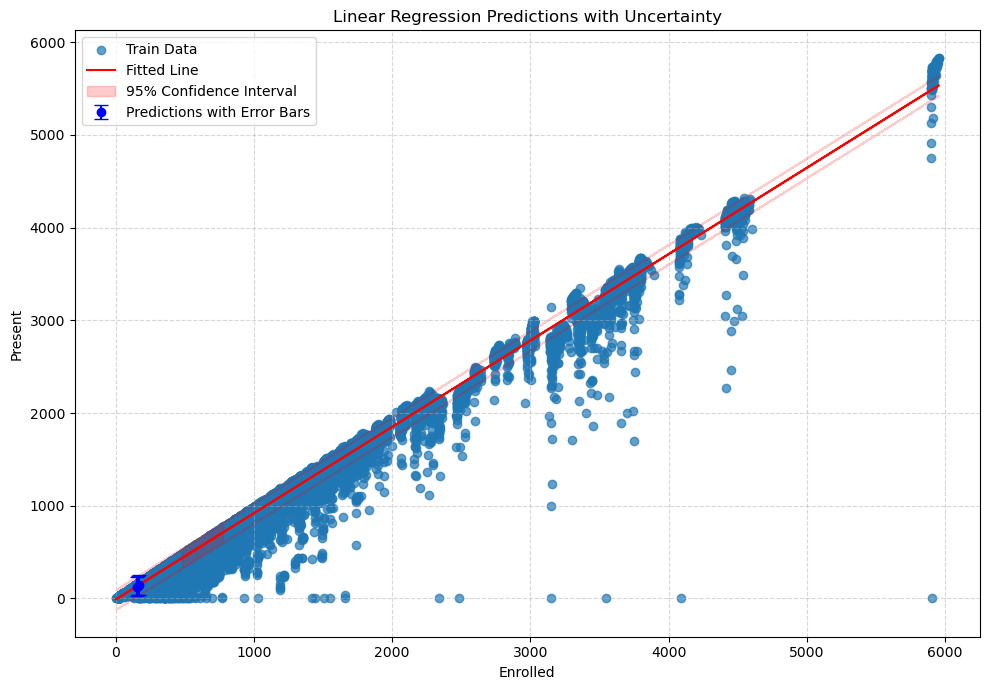

Predictions with Confidence Intervals:
New Point 1: Prediction=128.23, CI=(22.75, 233.71)
New Point 2: Prediction=137.55, CI=(32.06, 243.03)
New Point 3: Prediction=146.86, CI=(41.38, 252.34)


In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Select columns for regression
x_column = 'Enrolled'  # Replace with the independent variable
y_column = 'Present'   # Replace with the dependent variable

# Prepare the data
X = data[[x_column]].values
y = data[y_column].values

# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate residuals and standard error
residuals = y_train - y_pred_train
std_error = np.std(residuals)

# Calculate confidence intervals
conf_interval = 1.96 * std_error  # 95% confidence interval

# Plot train data, fitted line, and confidence intervals
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label='Train Data', alpha=0.7)
plt.plot(X_train, y_pred_train, color='red', label='Fitted Line')
plt.fill_between(
    X_train.flatten(),
    y_pred_train - conf_interval,
    y_pred_train + conf_interval,
    color='red', alpha=0.2, label='95% Confidence Interval'
)
plt.scatter(X_test, y_test, label='Test Data', alpha=0.7, color='green', marker='X')
plt.title(f'Linear Fit: {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Predict values for new points
new_points = np.array([[150], [160], [170]])  # Replace with your new data points
predictions = model.predict(new_points)

# Calculate prediction confidence intervals
pred_upper = predictions + conf_interval
pred_lower = predictions - conf_interval

# Plot predictions with error bars
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label='Train Data', alpha=0.7)
plt.plot(X_train, y_pred_train, color='red', label='Fitted Line')
plt.fill_between(
    X_train.flatten(),
    y_pred_train - conf_interval,
    y_pred_train + conf_interval,
    color='red', alpha=0.2, label='95% Confidence Interval'
)
plt.errorbar(new_points.flatten(), predictions, yerr=conf_interval, fmt='o', color='blue',
             label='Predictions with Error Bars', capsize=5)
plt.title(f'Linear Regression Predictions with Uncertainty')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print predictions with confidence intervals
print("Predictions with Confidence Intervals:")
for i, pred in enumerate(predictions):
    print(f"New Point {i+1}: Prediction={pred:.2f}, CI=({pred_lower[i]:.2f}, {pred_upper[i]:.2f})")

